## Mini AlexNet Baseline Results

Expects:

- weight.h5 files in ./weights 
- CIFAR10 data in ../data/cifar-10-batches-py/

and while the keras code needs py27, the notebooks can use py3.6 

In [1]:
import sys
import pickle, time
from copy import deepcopy
from shutil import copy
from tqdm import tqdm_notebook as tqdm

import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, EarlyStopping
from keras.optimizers import SGD
from keras.initializers import Constant
import keras.backend as K

import import_ipynb
import RMT_Util

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

print(sys.version)
print("numpy version {}".format(np.__version__))
print("tensforflow version {}".format(tf.__version__))
print("keras version {}".format(keras.__version__))
print("sklearn version {}".format(sklearn.__version__))

/Users/charleshmartin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from RMT_Util.ipynb
3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
scipy version 1.1.0
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1
powerlaw version 1.4.3
3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.3
tensforflow version 1.10.1
keras version 2.2.2
sklearn version 0.19.1


In [2]:
plt.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams.update({'font.size': 16})

In [3]:
model = RMT_Util.Alexnet_Model()

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [4]:
model.load_weights("cifar10_alexnet_wd.RC.h5")

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 96)        7296      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

#### Check baseline shapes

In [5]:
for il, layer in enumerate(model.layers):
    weights = layer.get_weights() 
    if len(weights)>0 :
        W = weights[0]
        print("layer ",il,": ", W.shape)

layer  0 :  (5, 5, 3, 96)
layer  2 :  (96,)
layer  3 :  (5, 5, 96, 256)
layer  5 :  (256,)
layer  7 :  (4096, 384)
layer  8 :  (384, 192)
layer  9 :  (192, 10)


### Fit Marchenko Pastur to ESD 


In [6]:
plt.rcParams['figure.figsize'] = [5,5]

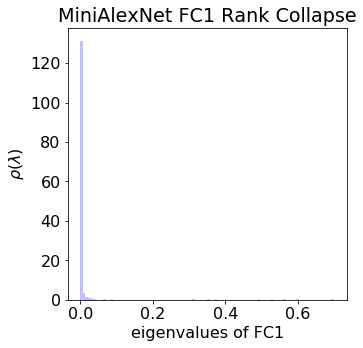

In [7]:

eigenvalues = RMT_Util.get_eigenvalues(model=model, weightfile="cifar10_alexnet_wd.RC.h5", layer=7)

plt.hist(eigenvalues, bins=100, alpha=0.25, color='blue', density=True);
plt.title("MiniAlexNet FC1 Rank Collapse")
plt.xlabel(r"eigenvalues of FC1")
plt.ylabel(r"$\rho(\lambda)$")
plt.savefig("img/fc1-rank-collapse.png")

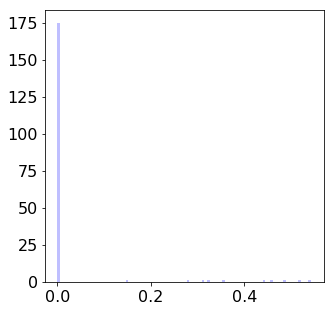

In [8]:
eigenvalues = RMT_Util.get_eigenvalues(model=model, weightfile="cifar10_alexnet_wd.RC.h5", layer=8)

plt.hist(eigenvalues, bins=100, alpha=0.25, color='blue', density=True);